In [1]:
# Install necessary libraries (only run if not already installed)
# !pip install tensorflow gradio opencv-python-headless matplotlib seaborn pillow scikit-learn --quiet

# General imports
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from PIL import Image
from datetime import datetime

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # ✅ Fixed here
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Sklearn
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Warnings
import warnings
warnings.filterwarnings("ignore")

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size and paths
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_path = 'data/train'
val_path = 'data/val'
test_path = 'data/test'

# ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_data = val_test_datagen.flow_from_directory(
    val_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_data = val_test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Class names
class_names = list(train_data.class_indices.keys())
print("🗂️ Classes:", class_names)


Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
🗂️ Classes: ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


Found 2400 images belonging to 10 classes.
This is image of e-waste dataset


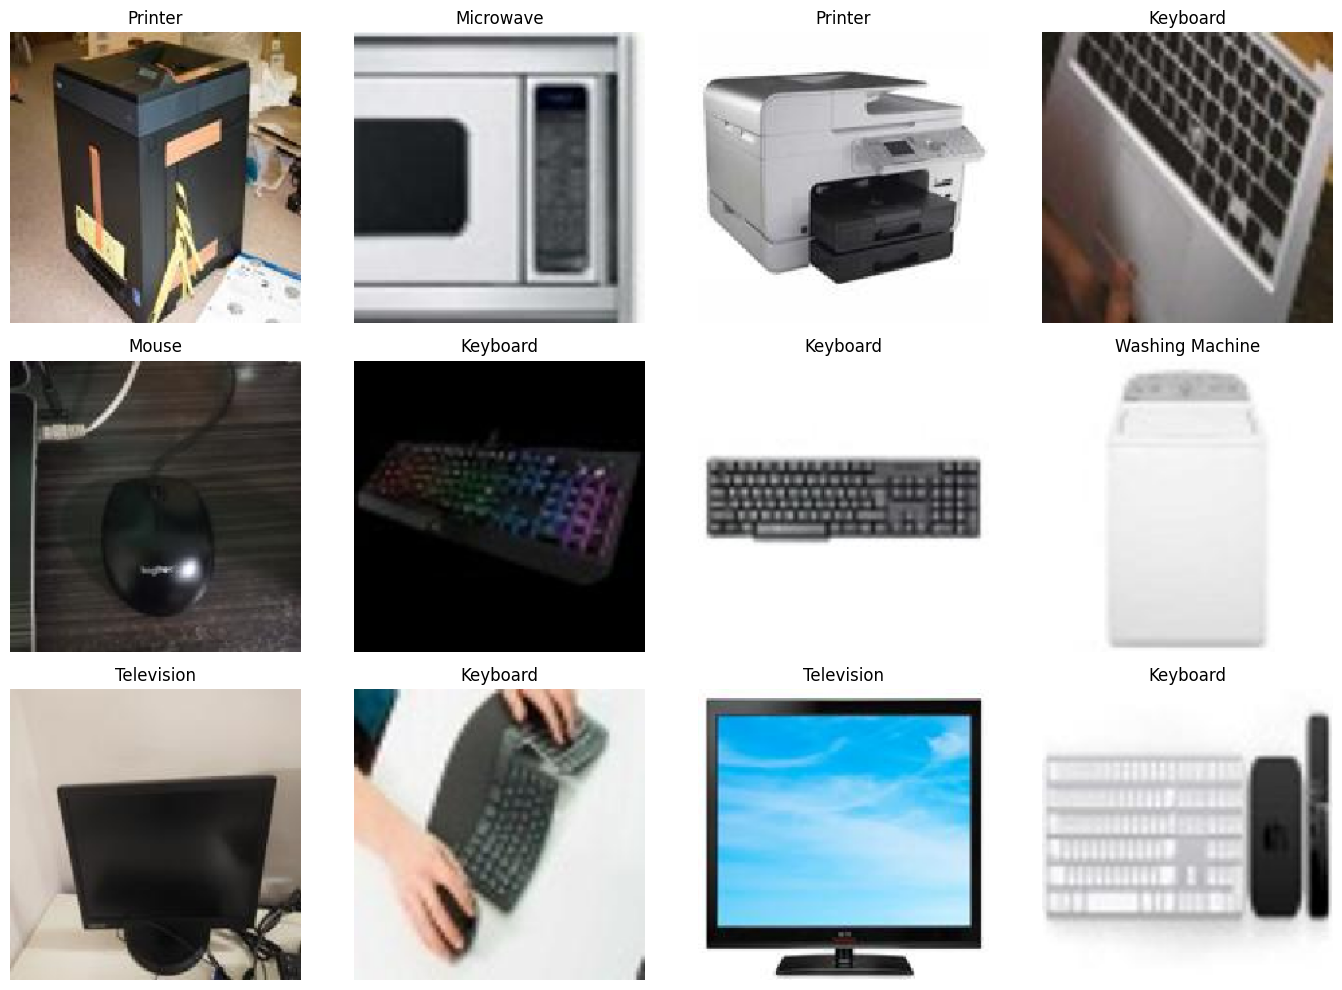

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Visualization generator (no complex preprocessing)
viz_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'data/train', target_size=(224, 224), batch_size=12, class_mode='sparse', shuffle=True
)

def show_sample_images(gen):
    images, labels = next(gen)
    label_map = {v: k for k, v in gen.class_indices.items()}

    plt.figure(figsize=(14, 10))
    for i in range(len(images)):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        plt.title(label_map[int(labels[i])])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

print("This is image of e-waste dataset")
show_sample_images(viz_gen)


<Figure size 1000x600 with 0 Axes>

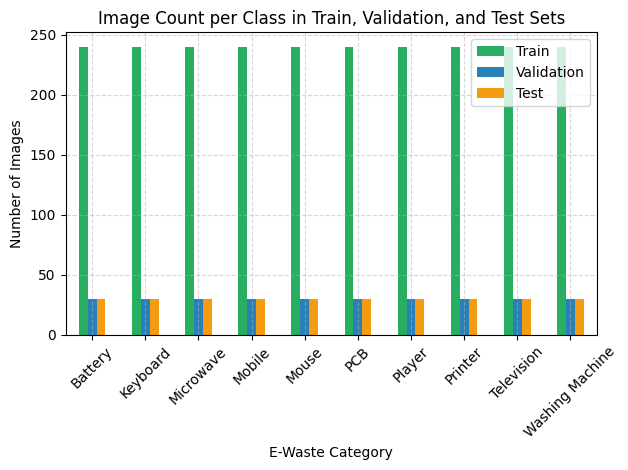

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


def count_images(directory):
    label_counts = {}
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            image_files = [
                f for f in os.listdir(label_path)
                if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))
            ]
            label_counts[label] = len(image_files)
    return label_counts

train_path = 'data/train'
val_path = 'data/val'
test_path = 'data/test'


train_counts = count_images(train_path)
val_counts = count_images(val_path)
test_counts = count_images(test_path)


df_counts = pd.DataFrame({
    'Train': pd.Series(train_counts),
    'Validation': pd.Series(val_counts),
    'Test': pd.Series(test_counts)
}).fillna(0).astype(int).sort_index()


plt.figure(figsize=(10, 6))
df_counts.plot(kind='bar', color=['#27ae60', '#2980b9', '#f39c12'])
plt.title('Image Count per Class in Train, Validation, and Test Sets')
plt.xlabel('E-Waste Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
🔁 Phase 1: Training top layers only...
Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5169 - loss: 1.5552
Epoch 1: val_accuracy improved from -inf to 0.95000, saving model to models/efficientnetv2b0_best.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.5198 - loss: 1.5483 - val_accuracy: 0.9500 - val_loss: 0.3354 - learning_rate: 0.0010
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9048 - loss: 0.4005
Epoch 2: val_accuracy improved from 0.95000 to 0.97000, saving model to models/efficientnetv2b0_best.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 522s 7s/step - accuracy: 0.9049 - loss: 0.4000 - val_accuracy: 0.9700 - val_loss: 0.1976 - learning_rate: 0.0010
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9359 - loss: 0.2663
Epoch 3: val_accuracy improved from 0.97000 to 0.97333, saving model to models/efficientnetv2b0_best.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 247s 

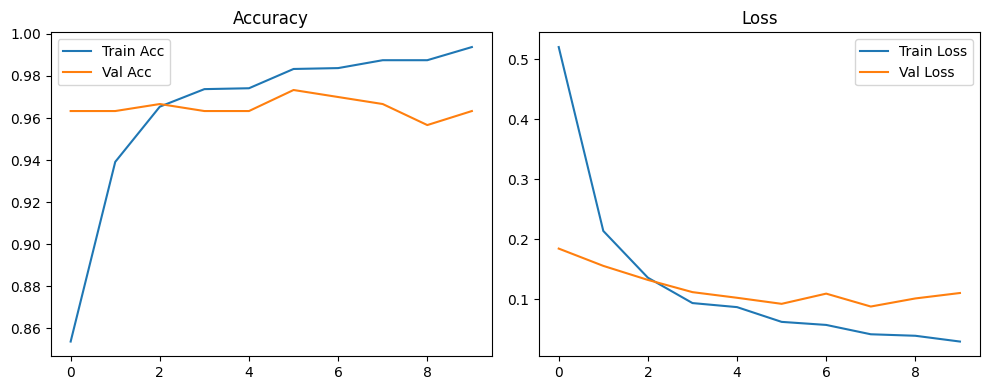

Found 300 images belonging to 10 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9802 - loss: 0.0759

✅ Test Accuracy: 98.33%
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step

📊 Classification Report:

                 precision    recall  f1-score   support

        Battery       0.94      0.97      0.95        30
       Keyboard       1.00      0.97      0.98        30
      Microwave       0.94      1.00      0.97        30
         Mobile       1.00      1.00      1.00        30
          Mouse       1.00      1.00      1.00        30
            PCB       0.97      0.97      0.97        30
         Player       1.00      0.97      0.98        30
        Printer       1.00      1.00      1.00        30
     Television       1.00      0.97      0.98        30
Washing Machine       1.00      1.00      1.00        30

       accuracy                           0.98       300
      macro avg       0.98      0.98      0.98       300
   weighted avg       0.98      0.98      0.98     

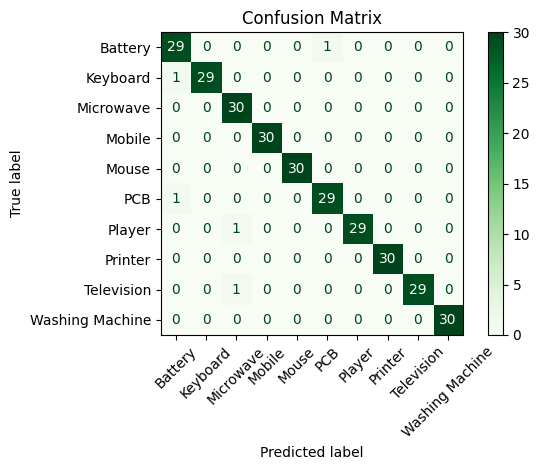

In [13]:
import os, time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# ✅ Configuration
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS_PHASE1 = 5
EPOCHS_PHASE2 = 10

DATASET_PATH = r"C:\Users\SANGESHRAJ\Desktop\jupyter project\e_waste_classification_project\data"
TRAIN_DIR = os.path.join(DATASET_PATH, "train")
VAL_DIR = os.path.join(DATASET_PATH, "val")
TEST_DIR = os.path.join(DATASET_PATH, "test")

# ✅ Data Generators
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_data = train_gen.flow_from_directory(TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="sparse")
val_data = val_gen.flow_from_directory(VAL_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="sparse")

# ✅ Compute Class Weights
y_train = train_data.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# ✅ Model
base_model = EfficientNetV2B0(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze initially

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)
output = Dense(train_data.num_classes, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(1e-3), loss=SparseCategoricalCrossentropy(), metrics=["accuracy"])

# ✅ Callbacks
os.makedirs("models", exist_ok=True)
checkpoint = ModelCheckpoint("models/efficientnetv2b0_best.keras", monitor="val_accuracy", save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, verbose=1)

# ✅ Phase 1: Train Top Layers
print("🔁 Phase 1: Training top layers only...")
model.fit(train_data, validation_data=val_data, epochs=EPOCHS_PHASE1,
          callbacks=[checkpoint, early_stop, reduce_lr], class_weight=class_weights)

# ✅ Phase 2: Fine-Tune Whole Model
print("\n🔁 Phase 2: Fine-tuning entire model...")
base_model.trainable = True
model.compile(optimizer=Adam(1e-4), loss=SparseCategoricalCrossentropy(), metrics=["accuracy"])

history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS_PHASE2,
                    callbacks=[checkpoint, early_stop, reduce_lr], class_weight=class_weights)

# ✅ Plot Training Curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# ✅ Evaluate on Test Data
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_data = test_gen.flow_from_directory(TEST_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="sparse", shuffle=False)

test_loss, test_acc = model.evaluate(test_data)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

# ✅ Classification Report & Confusion Matrix
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Greens, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [14]:
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define number of classes
num_classes = train_data.num_classes

# Load base model without top layers
base_model = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze base model
base_model.trainable = False

# Add custom classification layers
x = base_model.output 
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_1 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, 224, 224, 3)       │               0 │ rescaling_1[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_conv (Conv2D) │ (None, 112, 112, 16)      │           4,608 │ stem_activation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_bn            │ (None, 112, 112, 16)      │              64 │ block1a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_activation    │ (None, 112, 112, 16)      │               0 │ block1a_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_conv (Conv2D)  │ (None, 56, 56, 64)        │           9,216 │ block1a_project_activatio… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_bn             │ (None, 56, 56, 64)        │             256 │ block2a_expand_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_activation     │ (None, 56, 56, 64)        │               0 │ block2a_expand_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_project_conv (Conv2D) │ (None, 56, 56, 32)        │           2,048 │ block2a_expand_activation… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_project_bn            │ (None, 56, 56, 32)        │             128 │ block2a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 6,084,570 (23.21 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

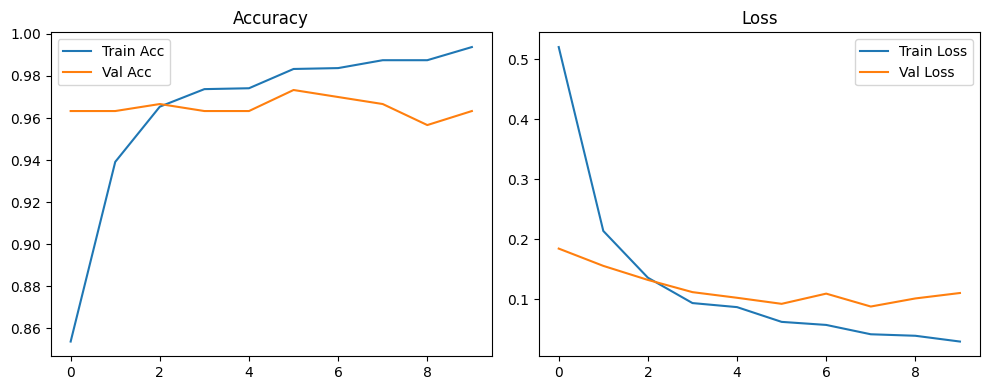

Found 300 images belonging to 10 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 986ms/step - accuracy: 0.9526 - loss: 0.2588

✅ Test Accuracy: 96.33%


In [25]:
# ✅ Plot Training Curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# ✅ Evaluate on Test Data
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_data = test_gen.flow_from_directory(TEST_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="sparse", shuffle=False)

test_loss, test_acc = model.evaluate(test_data)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step

📊 Classification Report:

                 precision    recall  f1-score   support

        Battery       0.93      0.90      0.92        30
       Keyboard       1.00      0.97      0.98        30
      Microwave       0.94      0.97      0.95        30
         Mobile       1.00      1.00      1.00        30
          Mouse       0.97      0.97      0.97        30
            PCB       0.94      0.97      0.95        30
         Player       0.94      0.97      0.95        30
        Printer       0.97      0.97      0.97        30
     Television       0.97      0.93      0.95        30
Washing Machine       1.00      1.00      1.00        30

       accuracy                           0.96       300
      macro avg       0.96      0.96      0.96       300
   weighted avg       0.96      0.96      0.96       300



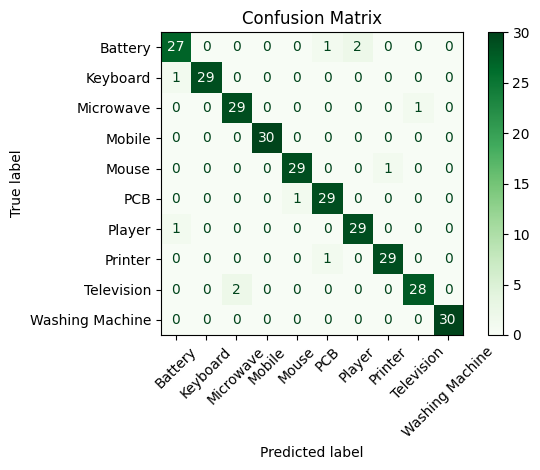

In [26]:



# ✅ Classification Report & Confusion Matrix
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Greens, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [27]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("models/efficientnetv2b0_e_waste.keras", compile=False)
print("✅ Model loaded successfully for inference.")


✅ Model loaded successfully for inference.


In [28]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("models/efficientnetv2b0_e_waste.keras", compile=False)
print("✅ Model loaded successfully for inference.")


✅ Model loaded successfully for inference.


In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# ✅ Load model
model = load_model("models/efficientnetv2b0_e_waste.keras", compile=False)

# ✅ Compile model (required before evaluation)
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print("✅ Model compiled and ready for evaluation.")


✅ Model compiled and ready for evaluation.


In [30]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# ✅ Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data, verbose=1)

# ✅ Print test performance
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"📉 Test Loss: {test_loss:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9526 - loss: 0.2588

✅ Test Accuracy: 96.33%
📉 Test Loss: 0.2201


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


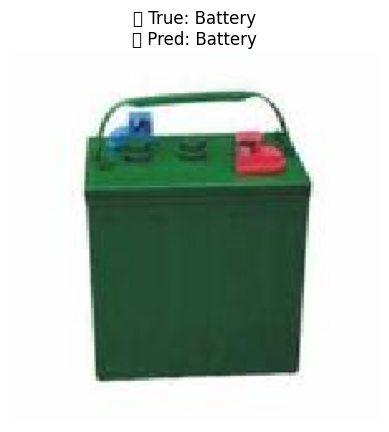

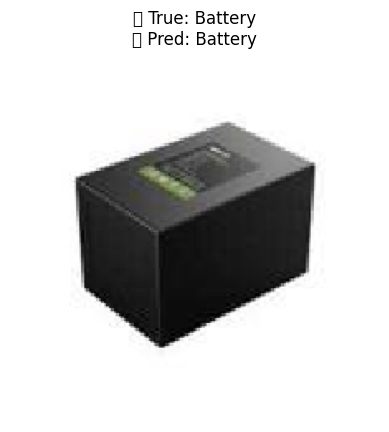

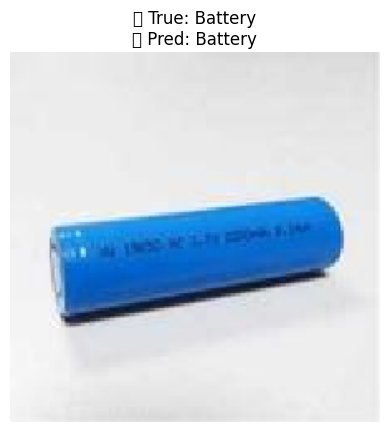

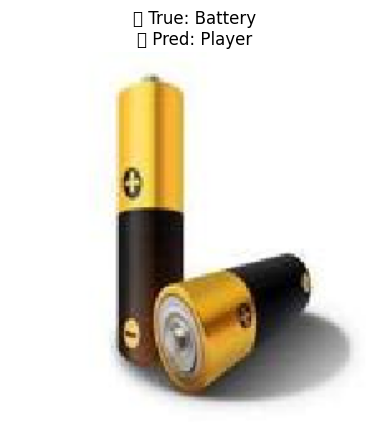

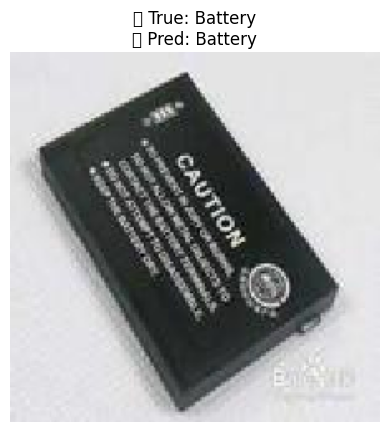

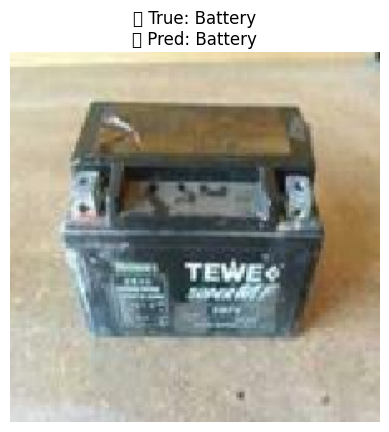

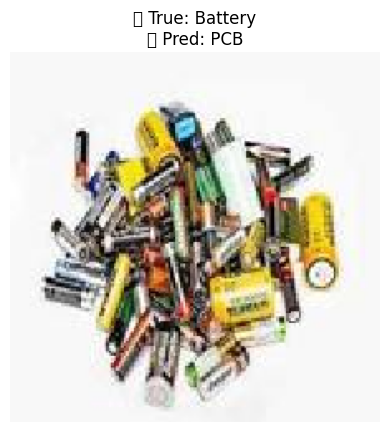

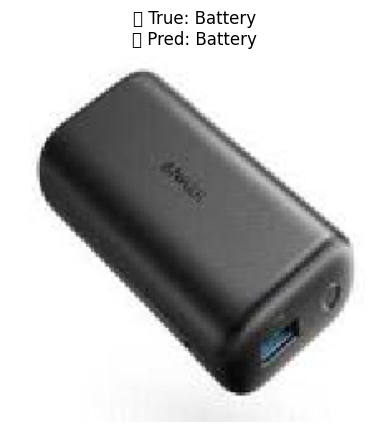

In [31]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# ✅ Class names from dataset
class_names = list(test_data.class_indices.keys())

# ✅ Get a batch of test images and labels
images, labels = next(test_data)

# If labels are one-hot encoded, convert to class indices
if labels.ndim > 1:
    labels = np.argmax(labels, axis=1)

# ✅ Predict on batch
predictions = model.predict(images)
pred_labels = tf.argmax(predictions, axis=1).numpy()

# ✅ Display first 8 predictions
for i in range(min(8, len(images))):
    img_display = images[i]
    if np.max(img_display) <= 1.0:
        img_display = (img_display * 255).astype("uint8")  # Rescale if normalized

    plt.imshow(img_display.astype("uint8"))
    true_label = class_names[int(labels[i])]
    predicted_label = class_names[int(pred_labels[i])]
    plt.title(f"✅ True: {true_label}\n🔍 Pred: {predicted_label}")
    plt.axis("off")
    plt.show()


In [1]:
!pip install gradio

Defaulting to user installation because normal site-packages is not writeable
